# Predicting age in crabs using machine learning - V2

- Author: Alejandro Santos
- Tools: Python, Pandas, NumPy, Jupyter Notebook, Scikit-learn, Matplotlib
- Dataset: Crag Age Prediction (Kaggle): https://www.kaggle.com/datasets/sidhus/crab-age-prediction

## 1.- Context and motivation

This project focuses on predicting the age of crabs using supervised machine learning techniques. After establishing a linear regression model as a baseline in Version 1, Version 2 explores the introduction of non-linear models to improve predictive performance.

## 2.- Modeling Approach - V2

Version 2 of the project focuses on improving predictive performance by introducing non-linear regression models and a more structured modeling workflow. The following approaches were employed:

- Polynomial regression models (degrees 2 and 3) to explicitly model non-linear relationships between physical crab features and age.

- A Random Forest Regressor to evaluate a tree-based ensemble approach without assuming linearity.

- A pipeline-based preprocessing strategy to integrate feature transformation and model training while avoiding data leakage.

- Performance evaluation using MAE and MSE to quantify prediction error, alongside R² to assess explanatory power.

## 3.- Dataset Overview

The dataset contains physical and morphological measurements of crabs, including size-related features and categorical variables such as sex. The target variable is crab age, treated as a continuous variable.

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [331]:
df = pd.read_csv("df_good.csv")

In [332]:
df

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,True,False,False
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,False,False,True
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,False,True,False
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,True,False,False
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
3886,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,True,False,False
3887,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,True,False,False
3888,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,False,True,False
3889,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,False,True,False


## 4.- Choice of independent and dependent variables

In [334]:
X = df.drop("Age", axis=1).values
y = df["Age"].values

print(X.shape, y.shape)
print(type(X), type(y))

(3891, 10) (3891,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## 5.- Dataset division

We used split training tests with a test size of 30%.

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6.- Creation of the preprocessing pipeline

In [340]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Preprocessing pipeline to obtain a second-degree polynomial linear regression and also standardize these values

In [342]:
pre_pipeline = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False))
])

## 7.- Fit to the linear polynomial regression model of degree 2

In [344]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [345]:
reg = LinearRegression()

In [346]:
pipeline_final = make_pipeline(pre_pipeline, reg)

In [347]:
pipeline_final.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('poly', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (an

#### 7.1.- Prediction of the polynomial linear regression model

In [349]:
pipeline_final_prediction = pipeline_final.predict(X_test)

print("The values predicted by polynomial linear regression are: {}".format(pipeline_final_prediction[:5]))
print("The actual values are: {}".format(y_test[:5]))

The values predicted by polynomial linear regression are: [10.88260542 11.3179611   9.57237028 11.73363892 10.4103058 ]
The actual values are: [11 11  9 16 11]


#### 7.2.- Graph of results of polynomial linear regression

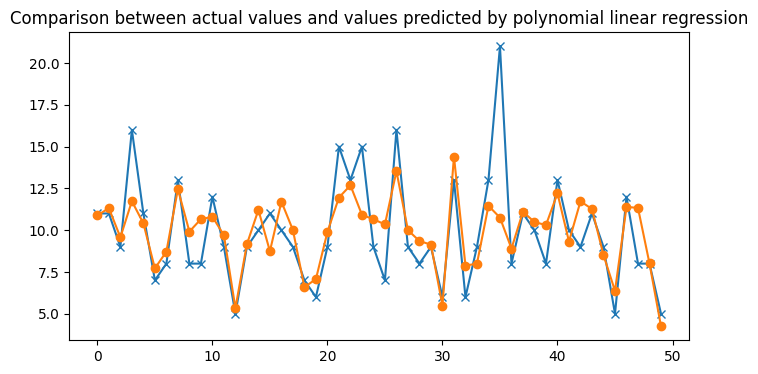

In [409]:
plt.figure(figsize = (8,4))
plt.plot(y_test[0:50], label="Valores reales", marker="x")
plt.plot(pipeline_final_prediction[0:50], label="Valores predichos", marker="o")
plt.title("Comparison between actual values and values predicted by polynomial linear regression")
plt.show()

#### 7.3.- Metrics for evaluating the results of polynomial linear regression

In [353]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [354]:
mae = mean_absolute_error(y_test, pipeline_final_prediction)
mse = mean_squared_error(y_test, pipeline_final_prediction)
r2 = r2_score(y_test, pipeline_final_prediction)

print("The results of the metrics are: MAE: {}, MSE: {}, R2: {}".format(mae, mse, r2))

The results of the metrics are: MAE: 1.440611469127792, MSE: 4.153750698269799, R2: 0.5876503961956671


## 8.- Fit to the linear polynomial regression model of degree 3

In [356]:
pre_pipeline_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=3, include_bias=False))
])

In [357]:
pipe_final_2 = make_pipeline(pre_pipeline_2, reg)

In [358]:
pipe_final_2.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('poly', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (an

#### 8.1.- Prediction of the linear polynomial regression model of degree 3

In [360]:
pipe_final_2_predictions = pipe_final_2.predict(X_test)

print("The values predicted by linear polynomial regression of degree 3 are: {}".format(pipe_final_2_predictions[:5]))
print("The actual values are: {}".format(y_test[:5]))

The values predicted by linear polynomial regression of degree 3 are: [10.67060034 11.58888414  9.29016442 11.7519117  10.15238291]
The actual values are: [11 11  9 16 11]


#### 8.2.- graph of polynomial linear regression of degree 3

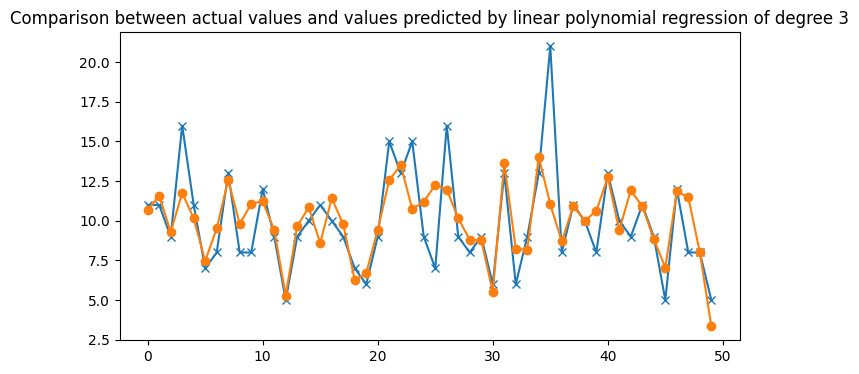

In [362]:
plt.figure(figsize=(8,4))
plt.plot(y_test[:50], label="Valores reales", marker="x")
plt.plot(pipe_final_2_predictions[:50], label="Valores predichos por regresion lineal polinomial grado 3", marker="o")
plt.title("Comparison between actual values and values predicted by linear polynomial regression of degree 3")
plt.show()

#### 8.3.- Evaluation metrics

In [364]:
mae_3 = mean_absolute_error(y_test, pipe_final_2_predictions)
mse_3 = mean_squared_error(y_test, pipe_final_2_predictions)
r2_3 = r2_score(y_test, pipe_final_2_predictions)

print("The results of the metrics are: MAE: {}, MSE: {}, R2: {}".format(mae_3, mse_3, r2_3))

The results of the metrics are: MAE: 1.5485939980601242, MSE: 4.953394246364593, R2: 0.5082684774929085


## 9.- Fitting to the random forest regressor model

In [366]:
from sklearn.ensemble import RandomForestRegressor

In [367]:
rfr =  RandomForestRegressor(random_state=42)

In [368]:
pipe_tree = make_pipeline(pre_pipeline, rfr)

In [369]:
pipe_tree.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('randomforestregressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('poly', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not wor

#### 9.1.- Prediction of the polynomial linear regression model

In [411]:
pipe_tree_predictions = pipe_tree.predict(X_test)

print("The values predicted by the random forest regressor are: {}".format(pipe_tree_predictions[:5]))
print("The actual values are: {}".format(y_test[:5]))

The values predicted by the random forest regressor are: [ 9.97 11.2  10.31 11.37  9.58]
The actual values are: [11 11  9 16 11]


#### 9.2.- Random forest regressor results graph

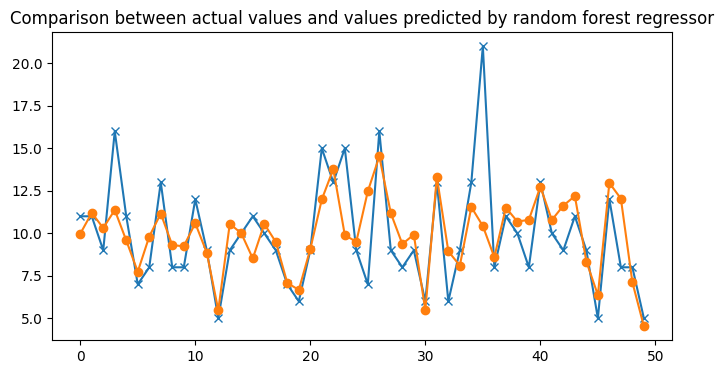

In [413]:
plt.figure(figsize=(8,4))
plt.plot(y_test[:50], label="Valores reales", marker="x")
plt.plot(pipe_tree_predictions[:50], label="Valores predichos", marker="o")
plt.title("Comparison between actual values ​​and values ​​predicted by random forest regressor")
plt.show()

#### 6.3.- Random forest regressor evaluation metrics

In [415]:
mae2 = mean_absolute_error(y_test, pipe_tree_predictions)
mse2 = mean_squared_error(y_test, pipe_tree_predictions)
r2_2 = r2_score(y_test, pipe_tree_predictions)

print("The results of the metrics are: MAE: {}, MSE: {}, R2: {}".format(mae2, mse2, r2_2))

The results of the metrics are: MAE: 1.5248801369863014, MSE: 4.700648972602739, R2: 0.533358912877615


## 10. Results and comparison

Both evaluated models show improvement over the linear regression model used as a baseline. While the Random Forest Regressor model was expected to perform best due to its ability to capture complex and nonlinear relationships, the empirical results show that this was not the case in this experiment.

The best performance was achieved by the second-degree polynomial linear regression, which obtained the lowest mean absolute error (MAE), indicating less variability in the magnitude of the prediction errors. Similarly, this model presented a lower mean squared error (MSE) and the highest coefficient of determination (R²), with an improvement of nearly one hundredth compared to the other evaluated models. In the context of applied machine learning, this difference is significant and suggests a real improvement in the model's explanatory power.

This superiority is also visually reflected in the comparison graphs, where the polynomial model's predictions show greater proximity to the actual values, demonstrating a better fit to the underlying data structure.

## 11.- Conclusion

While the Random Forest Regressor model has a high capacity for modeling complex and nonlinear relationships, the results obtained indicate that, under the conditions of this experiment, its performance was inferior to that of linear polynomial regression. This behavior can be attributed to several factors, including the limited size of the dataset, the absence of a hyperparameter fitting process, and the relatively smooth and structured nature of the relationship between the physical variables and the age of the crabs.

In contrast, second-degree polynomial regression achieves a more suitable balance between bias and variance, allowing it to capture nonlinear patterns without introducing excessive complexity. This translates into lower prediction errors and greater explanatory power, both numerically and visually.

These results demonstrate that a more complex model does not necessarily guarantee better performance and highlight the importance of selecting the model based on the characteristics of the problem and the available data, rather than on its technical sophistication.

## 12.- Future Work – Version 3

In the next stage of the project, the focus will shift toward improving model performance and robustness through more advanced modeling and optimization techniques. Planned improvements include:

- Hyperparameter tuning of ensemble-based models, particularly the Random Forest Regressor, to better control model complexity and improve generalization.

- Exploration of gradient boosting–based models, such as Gradient Boosting Regressor or XGBoost, to evaluate their performance on this dataset.

- Model segmentation by categorical variables, such as sex, to assess whether separate models can better capture subgroup-specific patterns.

- Feature importance analysis to identify the most influential physical characteristics in predicting crab age.

- Further evaluation of model generalization using cross-validation and additional diagnostic visualizations.

- Additional diagnostic visualizations will be incorporated, including residual analysis, predicted versus actual plots, and error distribution analysis. These visual tools will complement numerical metrics and provide deeper insight into model behavior and potential sources of error.

These steps aim to build upon the foundations established in Versions 1 and 2, progressively increasing model complexity while maintaining interpretability and methodological rigor.